In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load BioPlex Interactions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

# path to working dir
BioPlex_dir = '/n/data1/hms/dbmi/farhat/Roger/CCB/BioPlex'

In [3]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 12})

## [1] Baits

In [4]:
# load list of all "baits" targeted for AP-MS in 293T cells (Gene Symbol & Entrez Gene ID for proteins targeted as baits; number of interacting proteins identified)
BioPlex_baits_df = pd.read_csv(f'{BioPlex_dir}/data/baits/BioPlex_3.0_HCT116_baits.csv', sep = ',')

In [5]:
BioPlex_baits_df.head()

,Bait_Symbol,Entrez_gene_ID,Num_Interactors
0,A1BG,1,5
1,NAT2,10,1
2,AKT3,10000,11
3,NR2E3,10002,1
4,ACOT8,10005,2


In [6]:
np.shape(BioPlex_baits_df)

(5522, 3)

In [7]:
bait_Entrez_Gene_ids = set(BioPlex_baits_df.Entrez_gene_ID)

How many **baits** had **zero** interactors?

In [8]:
np.shape(BioPlex_baits_df[BioPlex_baits_df.Num_Interactors == 0])

(38, 3)

Distribution of **Number of Interactions** for each **bait**

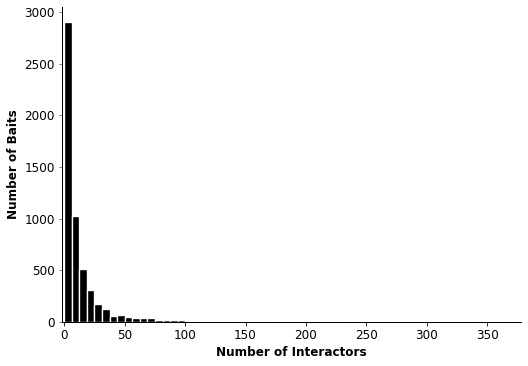

In [9]:
fig , ax = plt.subplots()

n , bins , patches = plt.hist(BioPlex_baits_df.Num_Interactors , bins = 60 , color = 'k' , rwidth = 1.0 , edgecolor='white', linewidth=1.35)

# plt.title('Number of Isolates Each SNP is Found in', fontweight = 'bold' , fontsize = 12, color = 'k')
plt.xlabel('Number of Interactors', fontweight = 'bold' , fontsize = 12, color = 'k')
plt.ylabel('Number of Baits', fontweight = 'bold' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(labelcolor = 'k')
#ax.set_yscale("log", nonposy='clip')
ax.set_xlim(-2, BioPlex_baits_df.Num_Interactors.max() + 2)

fig = plt.gcf()
fig.set_size_inches(7.5, 5.25)
fig.tight_layout()

plt.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
plt.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

#file_name = '/home/rv76/Farhat_Lab/Figures/Final_5/Scraping_rollingDB/Mean_Coverage_Distribution_across_all_isolates.pdf'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

##  [2] Merge *baits* with corresponding *ORF* sequences

Load **ORFeome** seqs & annotation

In [10]:
ORFeome_df = pd.read_pickle(f'{BioPlex_dir}/data/pickled_files/ORFeome_seqs_df.pkl')

In [11]:
ORFeome_df.head(n=3)

,ORF_ID,ORF_size,template_acc,Entrez_gene_ID,match,SEQ
0,403,159,"BC009508.2, BC010491.1",112597,PERFECT_MATCH,"(A, T, G, A, C, A, G, A, C, A, C, C, G, A, A, ..."
1,228,135,BC016025.1,9168,PERFECT_MATCH,"(A, T, G, G, C, A, G, A, C, A, A, A, C, C, A, ..."
2,52615,156,"BC031105.1, BC107049.2",222659,PERFECT_MATCH,"(A, T, G, C, A, G, C, T, G, A, G, A, C, A, C, ..."


In [12]:
np.shape(ORFeome_df)

(12583, 6)

Some Entrez gene IDs map to multiple ORFs

In [13]:
num_ORFs_per_gene_ID = pd.Series(Counter(ORFeome_df.Entrez_gene_ID))

In [14]:
sum(num_ORFs_per_gene_ID == 1)

10344

In [15]:
sum(num_ORFs_per_gene_ID > 1)

1094

In [16]:
ORFeome_seq_Entrez_gene_IDs = set(list(num_ORFs_per_gene_ID.index))

In [17]:
len(ORFeome_seq_Entrez_gene_IDs)

11438

**Baits**

In [18]:
BioPlex_baits_df.head(n=3)

,Bait_Symbol,Entrez_gene_ID,Num_Interactors
0,A1BG,1,5
1,NAT2,10,1
2,AKT3,10000,11


In [19]:
np.shape(BioPlex_baits_df)

(5522, 3)

In [20]:
BioPlex_bait_Entrez_gene_IDs = set(list(BioPlex_baits_df.Entrez_gene_ID))

In [21]:
len(BioPlex_bait_Entrez_gene_IDs)

5522

#### PROBLEM - several *baits* do not have a corresponding *ORF* when mapped using Entrez gene IDs

In [22]:
len(BioPlex_bait_Entrez_gene_IDs - ORFeome_seq_Entrez_gene_IDs)

260

In [23]:
len(ORFeome_seq_Entrez_gene_IDs.intersection(BioPlex_bait_Entrez_gene_IDs))

5262

In [24]:
len(ORFeome_seq_Entrez_gene_IDs - BioPlex_bait_Entrez_gene_IDs)

6176

#### Left merge the *bait* Entrez gene IDs with the corresponding *ORF seq* Entrez gene IDs

In [25]:
BioPlex_baits_df = BioPlex_baits_df.merge(ORFeome_df, how = 'left', on = 'Entrez_gene_ID')

In [26]:
BioPlex_baits_df.head(n=10)

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
0,A1BG,1,5,10134,1122,BC035719.1,PERFECT_MATCH,"(A, T, G, G, C, G, C, C, A, G, T, G, T, C, C, ..."
1,NAT2,10,1,7722,873,BC015878.1,PERFECT_MATCH,"(A, T, G, G, A, C, A, T, T, G, A, A, G, C, A, ..."
2,AKT3,10000,11,56787,1398,BC121154.2,PERFECT_MATCH,"(A, T, G, A, G, C, G, A, T, G, T, T, A, C, C, ..."
3,NR2E3,10002,1,11340,969,BC041421.1,PERFECT_MATCH,"(A, T, G, T, G, C, C, C, C, G, T, G, G, A, C, ..."
4,ACOT8,10005,2,53919,960,"BC117155.1, BC117157.1",PERFECT_MATCH,"(A, T, G, T, C, G, T, C, C, C, C, G, C, A, G, ..."
5,GNPDA1,10007,10,626,870,"BC012853.2, BC022322.1",PERFECT_MATCH,"(A, T, G, A, A, G, C, T, C, A, T, C, A, T, C, ..."
6,GNPDA1,10007,10,12810,870,BC020769.1,PERFECT_MATCH,"(A, T, G, A, A, G, C, T, C, A, T, C, A, T, C, ..."
7,KCNE3,10008,132,9450,312,BC032235.1,PERFECT_MATCH,"(A, T, G, G, A, G, A, C, T, A, C, C, A, A, T, ..."
8,ZBTB42,100128927,6,70870,1269,BC157833.1,PERFECT_MATCH,"(A, T, G, G, A, G, T, T, C, C, C, T, G, A, G, ..."
9,HDAC6,10013,5,8810,441,"BC005872.1, BC011498.1",PERFECT_MATCH,"(A, T, G, A, C, C, T, C, A, A, C, C, G, G, C, ..."


In [27]:
np.shape(BioPlex_baits_df)

(6316, 8)

### [2.1] Baits that *do not* map to any ORFs

In [28]:
BioPlex_baits_no_ORFs_dfs = BioPlex_baits_df[BioPlex_baits_df.ORF_ID.isnull()]

In [29]:
BioPlex_baits_no_ORFs_dfs.head()

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
18,IGLL5,100423062,39,NaN,NaN,NaN,NaN,NaN
20,SH2D3A,10045,63,NaN,NaN,NaN,NaN,NaN
55,CDH12,1010,13,NaN,NaN,NaN,NaN,NaN
78,PLXNC1,10154,2,NaN,NaN,NaN,NaN,NaN
91,THOC4,10189,7,NaN,NaN,NaN,NaN,NaN


In [30]:
np.shape(BioPlex_baits_no_ORFs_dfs)

(260, 8)

**drop** baits that have no corresponding ORFs

In [31]:
bait_has_ORF_filter = [not no_ORF_for_bait for no_ORF_for_bait in BioPlex_baits_df.ORF_ID.isnull()]
BioPlex_baits_df = BioPlex_baits_df[bait_has_ORF_filter]
BioPlex_baits_df.reset_index(inplace = True, drop = True)

In [32]:
BioPlex_baits_df.head()

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
0,A1BG,1,5,10134,1122,BC035719.1,PERFECT_MATCH,"(A, T, G, G, C, G, C, C, A, G, T, G, T, C, C, ..."
1,NAT2,10,1,7722,873,BC015878.1,PERFECT_MATCH,"(A, T, G, G, A, C, A, T, T, G, A, A, G, C, A, ..."
2,AKT3,10000,11,56787,1398,BC121154.2,PERFECT_MATCH,"(A, T, G, A, G, C, G, A, T, G, T, T, A, C, C, ..."
3,NR2E3,10002,1,11340,969,BC041421.1,PERFECT_MATCH,"(A, T, G, T, G, C, C, C, C, G, T, G, G, A, C, ..."
4,ACOT8,10005,2,53919,960,"BC117155.1, BC117157.1",PERFECT_MATCH,"(A, T, G, T, C, G, T, C, C, C, C, G, C, A, G, ..."


In [33]:
np.shape(BioPlex_baits_df)

(6056, 8)

### [2.2] Baits that map to multiple ORFs vs. Baits that map to only one ORF
- will appear as multiple Entrez gene ID row entries **or** appear as a single Entrez gene ID row entries

In [34]:
num_ORFs_per_bait = pd.Series(Counter(BioPlex_baits_df.Entrez_gene_ID))
num_ORFs_per_bait.sort_values(ascending = False, inplace = True)

In [35]:
num_ORFs_per_bait.head(n=2)

53833    3
55249    3
dtype: int64

In [36]:
num_ORFs_per_bait.tail(n=2)

2859    1
9991    1
dtype: int64

In [37]:
np.shape(num_ORFs_per_bait) #number of unique Entrez gene IDs represented

(5262,)

In [38]:
num_ORFs_per_bait.sum()

6056

755 baits (Entrez gene IDs) map to multiple ORFs

In [39]:
sum(num_ORFs_per_bait > 1)

755

In [40]:
bait_Entrez_gene_IDs_multiple_ORFs = set(num_ORFs_per_bait[num_ORFs_per_bait > 1].index)
bait_Entrez_gene_IDs_multiple_ORFs_filter = [(bait_Entrez_ID in bait_Entrez_gene_IDs_multiple_ORFs) for bait_Entrez_ID in BioPlex_baits_df.Entrez_gene_ID]

In [41]:
BioPlex_baits_df[bait_Entrez_gene_IDs_multiple_ORFs_filter].head(n = 6)

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
5,GNPDA1,10007,10,626,870,"BC012853.2, BC022322.1",PERFECT_MATCH,"(A, T, G, A, A, G, C, T, C, A, T, C, A, T, C, ..."
6,GNPDA1,10007,10,12810,870,BC020769.1,PERFECT_MATCH,"(A, T, G, A, A, G, C, T, C, A, T, C, A, T, C, ..."
9,HDAC6,10013,5,8810,441,"BC005872.1, BC011498.1",PERFECT_MATCH,"(A, T, G, A, C, C, T, C, A, A, C, C, G, G, C, ..."
10,HDAC6,10013,5,2397,3192,BC013737.1,PERFECT_MATCH,"(A, T, G, G, A, A, A, C, A, A, C, C, C, A, G, ..."
14,PIGK,10026,6,1949,999,BC026186.1,PERFECT_MATCH,"(A, T, G, G, C, C, G, T, C, A, C, C, G, A, C, ..."
15,PIGK,10026,6,13054,1188,BC020737.1,PERFECT_MATCH,"(A, T, G, G, C, C, G, T, C, A, C, C, G, A, C, ..."


4,507 baits (Entrez gene IDs) map to a single ORF

In [42]:
sum(num_ORFs_per_bait == 1)

4507

In [43]:
bait_Entrez_gene_IDs_one_ORF = set(num_ORFs_per_bait[num_ORFs_per_bait == 1].index)
bait_Entrez_gene_IDs_one_ORF_filter = [(bait_Entrez_ID in bait_Entrez_gene_IDs_one_ORF) for bait_Entrez_ID in BioPlex_baits_df.Entrez_gene_ID]

In [44]:
BioPlex_baits_df[bait_Entrez_gene_IDs_one_ORF_filter].head(n = 6)

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
0,A1BG,1,5,10134,1122,BC035719.1,PERFECT_MATCH,"(A, T, G, G, C, G, C, C, A, G, T, G, T, C, C, ..."
1,NAT2,10,1,7722,873,BC015878.1,PERFECT_MATCH,"(A, T, G, G, A, C, A, T, T, G, A, A, G, C, A, ..."
2,AKT3,10000,11,56787,1398,BC121154.2,PERFECT_MATCH,"(A, T, G, A, G, C, G, A, T, G, T, T, A, C, C, ..."
3,NR2E3,10002,1,11340,969,BC041421.1,PERFECT_MATCH,"(A, T, G, T, G, C, C, C, C, G, T, G, G, A, C, ..."
4,ACOT8,10005,2,53919,960,"BC117155.1, BC117157.1",PERFECT_MATCH,"(A, T, G, T, C, G, T, C, C, C, C, G, C, A, G, ..."
7,KCNE3,10008,132,9450,312,BC032235.1,PERFECT_MATCH,"(A, T, G, G, A, G, A, C, T, A, C, C, A, A, T, ..."


## [3] Interactions

_Column Descriptions_
- **GeneA**: Entrez Gene ID for the first interacting protein
- **GeneB**: Entrez Gene ID for the second interacting protein
- **SymbolA**: Symbol for the first interacting protein
- **SymbolB**: Symbol for the second interacting protein
- **p(Wrong ID)**: Probability of wrong protein ID (CompPASS-Plus)
- **p(NotInteractor)**: Probability of nonspecific background (CompPASS-Plus)
- **p(Interactor)**: Probability of high-confidence interaction (CompPASS-Plus)

In [45]:
# load BioPlex 3.0 interactions for HCT116 cell line, 70966 interactions
BioPlex_interactions_df = pd.read_csv(f'{BioPlex_dir}/data/interactions/BioPlex_3.0_interactions_HCT116_cells.tsv', sep = '\t')

In [46]:
BioPlex_interactions_df.head()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,88455,50649,Q8IZ07,Q9NR80-4,ANKRD13A,ARHGEF4,3.959215e-04,0.000033,0.999571
1,88455,115106,Q8IZ07,Q96CS2,ANKRD13A,HAUS1,4.488473e-02,0.001935,0.953181
2,88455,23086,Q8IZ07,Q8NEV8-2,ANKRD13A,EXPH5,7.402394e-05,0.000930,0.998996
3,88455,54930,Q8IZ07,Q9H6D7,ANKRD13A,HAUS4,9.180959e-07,0.000128,0.999871
4,88455,79441,Q8IZ07,Q68CZ6,ANKRD13A,HAUS3,8.709394e-07,0.001495,0.998504


In [47]:
BioPlex_interactions_df.tail()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
70961,55118,100509631,Q9NQ79-2,F5H8C6,CRTAC1,LOC100509631,1.619493e-01,0.003972,0.834079
70962,1813,2177,P14416-3,Q9BXW9-2,DRD2,FANCD2,1.538024e-04,0.174397,0.825449
70963,1813,22870,P14416-3,Q9UPN7,DRD2,PPP6R1,1.464248e-08,0.072449,0.927551
70964,1813,23243,P14416-3,O15084-1,DRD2,ANKRD28,2.105728e-04,0.202417,0.797373
70965,1910,57038,P24530-3,Q5T160,EDNRB,RARS2,1.006970e-01,0.079565,0.819738


In [48]:
BioPlex_interactions_df.shape

(70966, 9)

## [4] Pairs of genes that are not *recipricol* in the network

In [49]:
# find which pairs of genes are not "recipricol" (Gene1 > Gene2 but NOT Gene2 > Gene1) or (Gene2 > Gene1 but NOT Gene1 > Gene2)
unique_GeneA_ids = list(set(BioPlex_interactions_df.GeneA))
unique_GeneB_ids = list(set(BioPlex_interactions_df.GeneB))
all_unique_Gene_ids = set(unique_GeneA_ids + unique_GeneB_ids) # all genes detected in network

In [50]:
len(unique_GeneA_ids)

4866

In [51]:
len(unique_GeneB_ids)

7903

In [52]:
len(all_unique_Gene_ids) # 10,531 proteins reported in Hutten et al Cell 2021

10115

How many of **GeneA** were also **baits**?

In [53]:
np.sum([(gene_i in bait_Entrez_Gene_ids) for gene_i in unique_GeneA_ids])

4866

How many of **GeneB** were also **baits**?

In [54]:
np.sum([(gene_i in bait_Entrez_Gene_ids) for gene_i in unique_GeneB_ids])

2894

**GeneA** is always a **bait**, **GeneB** is always a **prey**

If genes are recipricol then **(GeneA-GeneB + GeneB-GeneA) = 2** else **(GeneA-GeneB + GeneB-GeneA) = 1**

In [55]:
GeneA_GeneB_list = [(str(BioPlex_interactions_df.loc[interaction_i,'GeneA']) + '_' + str(BioPlex_interactions_df.loc[interaction_i,'GeneB'])) for interaction_i in BioPlex_interactions_df.index] # GeneA - GeneB
GeneB_GeneA_list = [(str(BioPlex_interactions_df.loc[interaction_i,'GeneB']) + '_' + str(BioPlex_interactions_df.loc[interaction_i,'GeneA'])) for interaction_i in BioPlex_interactions_df.index] # GeneB - GeneA
gene_pair_recip_count = pd.Series(Counter(GeneA_GeneB_list + GeneB_GeneA_list))

In [56]:
gene_pair_recip_count.sort_values(ascending = True)

88455_50649    1
53407_9342     1
55610_9342     1
60412_9342     1
8775_9342      1
              ..
5553_8692      1
80863_92840    1
80863_10550    1
5553_115908    1
57038_1910     1
Length: 141932, dtype: int64

In [57]:
GeneA_GeneB_list[0:5]

['88455_50649', '88455_115106', '88455_23086', '88455_54930', '88455_79441']

In [58]:
GeneB_GeneA_list[0:5]

['50649_88455', '115106_88455', '23086_88455', '54930_88455', '79441_88455']

Non-redundant list of **bait-prey** pairs! Why? Any **baits** that were found to associate reciprocally had their scores combined

From *Huttlin et al 2015 Cell* : "After filtering, a non-redundant list of bait-prey pairs was assembled...In cases where two baits reciprocally associated with each other, their CompPASS-Plus scores were combined..."